Extract features from EmoDB dataset

In [3]:
import librosa
import os
import numpy as np
import pandas as pd

# Import metadatas

In [4]:
sr = 16000

In [6]:
#ravdess = pd.read_csv("/datasets/nicolas_facchinetti/processed_data/ravdess/processed_metadata.csv")
#emovo = pd.read_csv("/datasets/nicolas_facchinetti/processed_data/emovo/processed_metadata.csv")
#emodb = pd.read_csv("/datasets/nicolas_facchinetti/processed_data/emodb/processed_metadata.csv")

ravdess = pd.read_csv("D:\\Scuola\\TesiMag\\thesis_adversarial_ml_audio\\processed_data/ravdess/processed_metadata.csv")
emovo = pd.read_csv("D:\\Scuola\\TesiMag\\thesis_adversarial_ml_audio\\processed_data/emovo/processed_metadata.csv")
emodb = pd.read_csv("D:\\Scuola\\TesiMag\\thesis_adversarial_ml_audio\\processed_data/emodb/processed_metadata.csv")

In [7]:
emodb

,path,filename,label,actor,gender,length
0,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,03a01Fa.wav,happy,3,m,1.898277
1,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,03a01Nc.wav,neutral,3,m,1.611293
2,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,03a01Wa.wav,angry,3,m,1.877823
3,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,03a02Fc.wav,happy,3,m,2.006259
4,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,03a02Nc.wav,neutral,3,m,1.439819
...,...,...,...,...,...,...
530,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,16b10Lb.wav,bored,16,f,3.442721
531,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,16b10Tb.wav,sad,16,f,3.500635
532,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,16b10Td.wav,sad,16,f,3.934195
533,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,16b10Wa.wav,angry,16,f,2.414150


In [8]:
ravdess

,path,filename,label,actor,gender,length
0,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,03-01-01-01-01-01-01.wav,neutral,Actor_01,m,3.303311
1,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,03-01-01-01-01-02-01.wav,neutral,Actor_01,m,3.336689
2,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,03-01-01-01-02-01-01.wav,neutral,Actor_01,m,3.269932
3,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,03-01-01-01-02-02-01.wav,neutral,Actor_01,m,3.169841
4,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,03-01-02-01-01-01-01.wav,calm,Actor_01,m,3.536871
...,...,...,...,...,...,...
1435,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,03-01-08-01-02-02-24.wav,surprised,Actor_24,f,3.403401
1436,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,03-01-08-02-01-01-24.wav,surprised,Actor_24,f,3.937279
1437,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,03-01-08-02-01-02-24.wav,surprised,Actor_24,f,3.970658
1438,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,03-01-08-02-02-01-24.wav,surprised,Actor_24,f,3.670340


In [9]:
emovo

,path,filename,label,actor,gender,length
0,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,dis-f1-b1.wav,disgust,f1,f,2.858685
1,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,dis-f1-b2.wav,disgust,f1,f,2.858685
2,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,dis-f1-b3.wav,disgust,f1,f,2.389342
3,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,dis-f1-d1.wav,disgust,f1,f,1.992018
4,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,dis-f1-d2.wav,disgust,f1,f,2.782676
...,...,...,...,...,...,...
583,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,tri-m3-n1.wav,sad,m3,m,1.877370
584,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,tri-m3-n2.wav,sad,m3,m,3.114694
585,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,tri-m3-n3.wav,sad,m3,m,2.474694
586,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,tri-m3-n4.wav,sad,m3,m,4.906667


In [10]:
frames = {'emodb': emodb, 'emovo': emovo, 'ravdess': ravdess}

result = pd.concat(frames.values())
result

,path,filename,label,actor,gender,length
0,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,03a01Fa.wav,happy,3,m,1.898277
1,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,03a01Nc.wav,neutral,3,m,1.611293
2,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,03a01Wa.wav,angry,3,m,1.877823
3,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,03a02Fc.wav,happy,3,m,2.006259
4,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,03a02Nc.wav,neutral,3,m,1.439819
...,...,...,...,...,...,...
1435,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,03-01-08-01-02-02-24.wav,surprised,Actor_24,f,3.403401
1436,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,03-01-08-02-01-01-24.wav,surprised,Actor_24,f,3.937279
1437,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,03-01-08-02-01-02-24.wav,surprised,Actor_24,f,3.970658
1438,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,03-01-08-02-02-01-24.wav,surprised,Actor_24,f,3.670340


# Example fetures extraction

In [11]:
example_audio = emovo.path[10]
samples, sample_rate = librosa.load(example_audio, sr=sr)

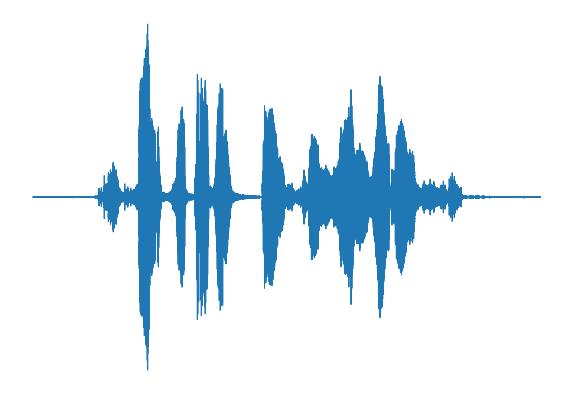

In [12]:
import librosa.display
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.axis('off')
librosa.display.waveshow(samples, sr=sample_rate)

In [13]:
import IPython
IPython.display.Audio(samples, rate=sr)

C:\Users\Nicolas Facchinetti\AppData\Local\Temp\ipykernel_14172\767138357.py:2: FutureWarning: Pass y=[-2.4625944e-04 -4.4862289e-04 -3.5548382e-04 ...  1.3619715e-04
  2.4357831e-05  6.6462635e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_scale_sgram = librosa.feature.melspectrogram(samples, sr=sample_rate, n_fft=368, hop_length=184, n_mels=128)


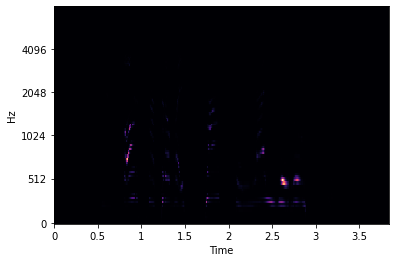

In [17]:
# use the mel-scale instead of raw frequency
mel_scale_sgram = librosa.feature.melspectrogram(samples, sr=sample_rate, n_fft=368, hop_length=184, n_mels=128)
librosa.display.specshow(mel_scale_sgram, sr=sample_rate, n_fft=368, hop_length=184, x_axis='time', y_axis='mel')

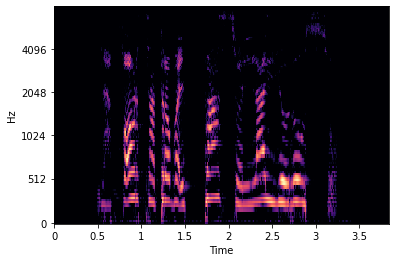

In [19]:
# use the decibel scale to get the final Mel Spectrogram
log_mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)
librosa.display.specshow(log_mel_sgram, sr=sample_rate, n_fft=368, hop_length=184, x_axis='time', y_axis='mel')

Try to trim start and end silence

C:\Users\Nicolas Facchinetti\AppData\Local\Temp\ipykernel_14172\288648120.py:2: FutureWarning: Pass y=[-0.00042698  0.0005423  -0.00024657 ... -0.0016948  -0.00097595
 -0.00097961] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_trimmed = librosa.feature.melspectrogram(trimmed, sr=sample_rate, n_fft=368, hop_length=184, n_mels=128)


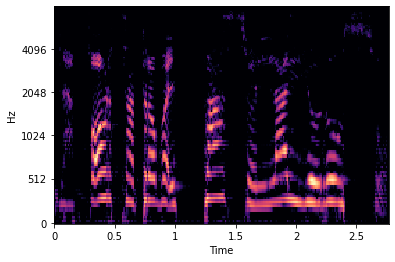

In [20]:
trimmed = librosa.effects.trim(samples, top_db=30, frame_length=512, hop_length=64)[0]
mel_trimmed = librosa.feature.melspectrogram(trimmed, sr=sample_rate, n_fft=368, hop_length=184, n_mels=128)
log_mel_trimmed = librosa.amplitude_to_db(mel_trimmed, ref=np.min)
librosa.display.specshow(log_mel_trimmed, sr=sr, n_fft=368, hop_length=184, x_axis='time', y_axis='mel')
IPython.display.Audio(trimmed, rate=sr)

# Length analysis

Original length of all the samples

count    2563.000000
mean        3.375437
std         0.924356
min         1.225533
25%         2.885215
50%         3.536871
75%         3.837188
max        13.994694
Name: length, dtype: float64

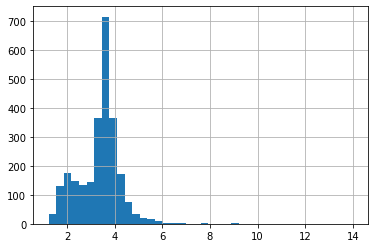

In [21]:
result["length"].hist(bins=40)
stock_l = result["length"].describe()
stock_l

# Load and trim the samples for each dataset

In [22]:
def load_samples(metadata):
    samples = []
    for _, data in metadata.iterrows():
        # load audio data
        path = data["path"]
        sample, _ = librosa.load(path, sr=sr)
        trimmed = librosa.effects.trim(sample, top_db=30, frame_length=512, hop_length=64)[0]
        samples.append(trimmed)
    return samples

In [23]:
dataset_samples = {}
for dataset in frames:
    print(f'Processing {dataset}')
    dataset_samples[dataset] = load_samples(frames[dataset])

Processing emodb
Processing emovo
Processing ravdess


In [29]:
len(dataset_samples['emodb']), len(frames['emodb']), len(dataset_samples['emovo']), len(frames['emovo'])len(dataset_samples['ravdess']), len(frames['ravdess'])

(535, 535, 588, 588, 1440, 1440)

Update metadata with new lengths

In [25]:
for d in dataset_samples:
    trimmed_length = [len(s)/sr for s in dataset_samples[d]]
    frames[d]['trimmed_lenght'] = trimmed_length

In [26]:
result = pd.concat(frames.values())
result

,path,filename,label,actor,gender,length,trimmed_lenght
0,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,03a01Fa.wav,happy,3,m,1.898277,1.656
1,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,03a01Nc.wav,neutral,3,m,1.611293,1.328
2,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,03a01Wa.wav,angry,3,m,1.877823,1.640
3,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,03a02Fc.wav,happy,3,m,2.006259,1.792
4,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,03a02Nc.wav,neutral,3,m,1.439819,1.220
...,...,...,...,...,...,...,...
1435,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,03-01-08-01-02-02-24.wav,surprised,Actor_24,f,3.403401,1.388
1436,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,03-01-08-02-01-01-24.wav,surprised,Actor_24,f,3.937279,1.924
1437,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,03-01-08-02-01-02-24.wav,surprised,Actor_24,f,3.970658,1.928
1438,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,03-01-08-02-02-01-24.wav,surprised,Actor_24,f,3.670340,1.948


Trimmed length analysis

,length,trimmed_lenght
count,2563.000000,2563.00000
mean,3.375437,2.13118
std,0.924356,0.91958
min,1.225533,0.90000
25%,2.885215,1.56400
50%,3.536871,1.85200
75%,3.837188,2.40800
max,13.994694,13.94800


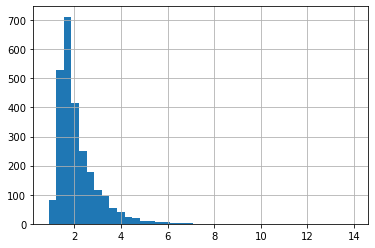

In [27]:
result["trimmed_lenght"].hist(bins=40)
trim_l = result["trimmed_lenght"].describe()
pd.concat([stock_l, trim_l], axis=1)

In [33]:
min_l = result["trimmed_lenght"].describe()["min"]
min_s = result.loc[result['trimmed_lenght'] == min_l]
min_s

,path,filename,label,actor,gender,length,trimmed_lenght
340,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,pau-m1-d2.wav,fear,m1,m,1.92,0.9


In [37]:
short_sample = dataset_samples['emovo'][340]
IPython.display.Audio(short_sample, rate=sr)

In [38]:
min_sample = librosa.load(min_s.path[340], sr=sr)[0]
IPython.display.Audio(min_sample, rate=sr)

C:\Users\Nicolas Facchinetti\AppData\Local\Temp\ipykernel_14172\2631549095.py:1: FutureWarning: Pass y=[-1.1006718e-03 -1.0997665e-03 -1.2131915e-03 ... -1.6036804e-03
 -3.8770116e-03  5.8755690e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_trimmed = librosa.feature.melspectrogram(short_sample, sr=sample_rate, n_fft=368, hop_length=184, n_mels=128)


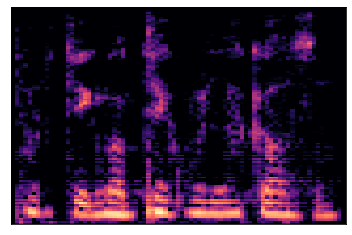

In [39]:
mel_trimmed = librosa.feature.melspectrogram(short_sample, sr=sample_rate, n_fft=368, hop_length=184, n_mels=128)
log_mel_trimmed = librosa.amplitude_to_db(mel_trimmed, ref=np.min)
librosa.display.specshow(log_mel_trimmed, sr=sr)

# Split and repeat

Let's keep a sample length equal to 3 seconds, repeat the shorter while split the longer segments. Throw away samples below min lenght

In [52]:
target_l = 3
buffer_length = target_l*sr
target_l, buffer_length

(3, 48000)

In [53]:
import math 
def repeat_sample(data, length):
    n = math.ceil(length/len(data))
    data = np.tile(data, n)
    return data[:int(length)]

In [54]:
repeated = repeat_sample(short_sample, buffer_length)
len(repeated)/sr

3.0

C:\Users\Nicolas Facchinetti\AppData\Local\Temp\ipykernel_14172\119482506.py:1: FutureWarning: Pass y=[-0.00110067 -0.00109977 -0.00121319 ...  0.14599895  0.12819809
  0.13458316] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  log_mel_trimmed = librosa.amplitude_to_db(librosa.feature.melspectrogram(repeated, sr=sample_rate, n_fft=368, hop_length=184, n_mels=128), ref=np.min)


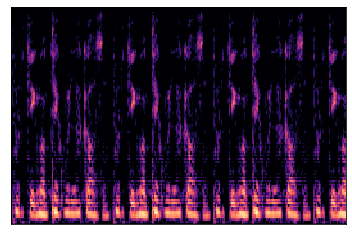

In [55]:
log_mel_trimmed = librosa.amplitude_to_db(librosa.feature.melspectrogram(repeated, sr=sample_rate, n_fft=368, hop_length=184, n_mels=128), ref=np.min)
librosa.display.specshow(log_mel_trimmed, sr=sr)

In [56]:
IPython.display.Audio(repeated, rate=sr)

In [57]:
max_l = result["trimmed_lenght"].describe()["max"]
max_s = result.loc[result['trimmed_lenght'] == max_l, "path"]
max_s

391    D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...
Name: path, dtype: object

In [58]:
long_sample = dataset_samples['emovo'][391]
long_sample, len(long_sample)/sr

(array([-1.8111437e-04, -6.4358261e-04,  1.5116505e-05, ...,
         1.0038956e-04, -6.0805539e-04,  3.1681026e-05], dtype=float32),
 13.948)

In [59]:
IPython.display.Audio(long_sample, rate=sr)

In [60]:
def split_sample(audio, length, minimum):
    samples_total = len(audio)
    samples_wrote = 0
    segments = []
    
    to_process = samples_total - samples_wrote
    while to_process > minimum:
        segment = audio[samples_wrote : (samples_wrote + length)]
        segments.append(segment)
        samples_wrote += length
        to_process = samples_total - samples_wrote
    return segments

In [61]:
splitted = split_sample(long_sample, int(buffer_length), int(min_l))
[len(s)/sr for s in splitted]

[3.0, 3.0, 3.0, 3.0, 1.948]

In [62]:
IPython.display.Audio(splitted[4], rate=sr)

C:\Users\Nicolas Facchinetti\AppData\Local\Temp\ipykernel_14172\3821104542.py:1: FutureWarning: Pass y=[-1.8111437e-04 -6.4358261e-04  1.5116505e-05 ...  3.3993850e-04
 -1.9297564e-04 -9.4525190e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  log_mel_trimmed = librosa.amplitude_to_db(librosa.feature.melspectrogram(splitted[0], sr=sample_rate, n_fft=368, hop_length=184, n_mels=128), ref=np.min)


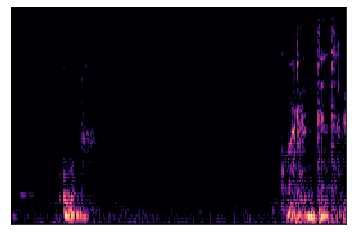

In [64]:
log_mel_trimmed = librosa.amplitude_to_db(librosa.feature.melspectrogram(splitted[0], sr=sample_rate, n_fft=368, hop_length=184, n_mels=128), ref=np.min)
librosa.display.specshow(log_mel_trimmed, sr=sr)

In [73]:
log_mel_trimmed.shape

(128, 261)

# Dataset processing

Split and repeat all the samples to the same length, then extract log Mel-specotrograms from all the samples

In [65]:
result.head()

,path,filename,label,actor,gender,length,trimmed_lenght
0,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,03a01Fa.wav,happy,3,m,1.898277,1.656
1,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,03a01Nc.wav,neutral,3,m,1.611293,1.328
2,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,03a01Wa.wav,angry,3,m,1.877823,1.640
3,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,03a02Fc.wav,happy,3,m,2.006259,1.792
4,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,03a02Nc.wav,neutral,3,m,1.439819,1.220


In [82]:
from tqdm.notebook import tqdm

def process_audio_files(audio_data, metadata):
    sgram_list = []
    audio_list = []
    mod_data = []
    for idx, data in tqdm(metadata.iterrows(), total=metadata.shape[0]):
        # load audio data
        sample = audio_data[idx]
        
        
        splitted_list = []
        # split the larger segmtents
        if len(sample) >= buffer_length:
            splitted = split_sample(sample, int(buffer_length), int(min_l))
            # trim silent parts in each splitted frame
            samples = [(librosa.effects.trim(splitted_sample, top_db=30, frame_length=512, hop_length=64)[0], num)
                       for num, splitted_sample in enumerate(splitted)]
            splitted_list += samples
        else:
            splitted_list.append((sample, 0))
           
        # repeat the shorter segments
        for sample in splitted_list:
            s = sample[0]
            if len(s) < buffer_length:
                s = repeat_sample(s, buffer_length)
            
            # compute log mel-spectrograms
            mel_scale_sgram = librosa.feature.melspectrogram(y=s, sr=sr, n_fft=368, hop_length=184, n_mels=128)
            log_mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)
            
            # save computation
            audio_list.append(s)
            sgram_list.append(log_mel_sgram)
            mod_data.append([data["path"], data["filename"], sample[1], data["label"], data["actor"], data["gender"]])

    df_info_mod = pd.DataFrame(mod_data, columns=['path', 'filename', 'chunk', 'label', 'actor', 'gender'])
    return sgram_list, audio_list, df_info_mod

In [83]:
frames['emovo']

,path,filename,label,actor,gender,length,trimmed_lenght
0,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,dis-f1-b1.wav,disgust,f1,f,2.858685,1.592
1,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,dis-f1-b2.wav,disgust,f1,f,2.858685,1.704
2,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,dis-f1-b3.wav,disgust,f1,f,2.389342,1.644
3,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,dis-f1-d1.wav,disgust,f1,f,1.992018,1.176
4,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,dis-f1-d2.wav,disgust,f1,f,2.782676,1.656
...,...,...,...,...,...,...,...
583,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,tri-m3-n1.wav,sad,m3,m,1.877370,1.476
584,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,tri-m3-n2.wav,sad,m3,m,3.114694,2.356
585,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,tri-m3-n3.wav,sad,m3,m,2.474694,1.892
586,D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...,tri-m3-n4.wav,sad,m3,m,4.906667,3.796


In [84]:
process_audio_files(dataset_samples['emovo'], frames['emovo'].iloc[[0]]) 

  0%|          | 0/1 [00:00<?, ?it/s]

([array([[44.56948 , 44.56948 , 44.56948 , ..., 44.56948 , 44.56948 ,
          44.56948 ],
         [44.56948 , 44.56948 , 44.56948 , ..., 44.56948 , 46.650013,
          44.56948 ],
         [44.56948 , 44.56948 , 44.56948 , ..., 44.56948 , 44.56948 ,
          44.56948 ],
         ...,
         [44.56948 , 44.56948 , 44.56948 , ..., 44.56948 , 44.56948 ,
          44.56948 ],
         [44.56948 , 44.56948 , 44.56948 , ..., 44.56948 , 44.56948 ,
          44.56948 ],
         [44.56948 , 44.56948 , 44.56948 , ..., 44.56948 , 44.56948 ,
          44.56948 ]], dtype=float32)],
 [array([-6.602650e-05, -9.182919e-05, -9.455590e-05, ...,  1.171184e-02,
         -8.175519e-03,  4.651449e-03], dtype=float32)],
                                                 path       filename  chunk  \
 0  D:\Scuola\TesiMag\thesis_adversarial_ml_audio\...  dis-f1-b1.wav      0   
 
      label actor gender  
 0  disgust    f1      f  )

In [85]:
elaborated_data = {}
for dataset in frames:
    sgram, audio, df = process_audio_files(dataset_samples[dataset], frames[dataset])
    print(f"Done {dataset}")
    elaborated_data[dataset] = {"sgram": sgram, 'audio':audio, "df":df}

  0%|          | 0/535 [00:00<?, ?it/s]

Done emodb


  0%|          | 0/588 [00:00<?, ?it/s]

Done emovo


  0%|          | 0/1440 [00:00<?, ?it/s]

Done ravdess


# Save data

Save data for future computations

In [87]:
for dataset in frames:
    sgram = elaborated_data[dataset]["sgram"]
    df = elaborated_data[dataset]["df"]
    
    # np.save(f'/datasets/nicolas_facchinetti/processed_data/{dataset}/x_multif.npy', x)
    # df.to_csv(f"/datasets/nicolas_facchinetti/processed_data/{dataset}/metadata_multif.csv", index=False)
    
    np.save(f'D:\\Scuola\\TesiMag\\thesis_adversarial_ml_audio\\processed_data/{dataset}/sgram_pre_aug.npy', sgram)
    df.to_csv(f"D:\\Scuola\\TesiMag\\thesis_adversarial_ml_audio\\processed_data//{dataset}/metadata_pre_aug.csv", index=False)